# Actividad 3
+ Francisco Javier Sanchez Panduro - A01639832
+ Vanessa Mendez Palacios - A01639925
+ Estefania Perez Yeo - A01639270
+ Diego Sú Gómez - A01620476
+ Isai Ambrocio - A01625101

In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot, lag_plot
from patsy import dmatrices
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [216]:
raw_data = pd.read_csv('dow_jones_index.data', index_col=[0])

In [217]:
raw_data.head()

,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
quarter,,,,,,,,,,,,,,,
1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [218]:
clean_df = raw_data[['date', 'high', 'low', 'volume', 'percent_change_price']].copy()

In [219]:
formatted_date = pd.to_datetime(clean_df['date'])
clean_df['date'] = formatted_date

In [220]:
clean_df.head()

,date,high,low,volume,percent_change_price
quarter,,,,,
1,2011-01-07,$16.72,$15.78,239655616,3.79267
1,2011-01-14,$16.71,$15.64,242963398,-4.42849
1,2011-01-21,$16.38,$15.60,138428495,-2.47066
1,2011-01-28,$16.63,$15.82,151379173,1.63831
1,2011-02-04,$17.39,$16.18,154387761,5.93325


In [221]:
clean_df = clean_df.set_index(['date'])

In [222]:
clean_df.head()

,high,low,volume,percent_change_price
date,,,,
2011-01-07,$16.72,$15.78,239655616,3.79267
2011-01-14,$16.71,$15.64,242963398,-4.42849
2011-01-21,$16.38,$15.60,138428495,-2.47066
2011-01-28,$16.63,$15.82,151379173,1.63831
2011-02-04,$17.39,$16.18,154387761,5.93325


In [223]:
high_list = []
for i in clean_df['high']:
    high_list.append(i[1:])

In [224]:
low_list = []
for i in clean_df['low']:
    low_list.append(i[1:])

In [225]:
df = clean_df

In [226]:
df['high'] = high_list

In [227]:
df['low'] = low_list

In [228]:
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])

In [229]:
df.sort_index(ascending = True)

,high,low,volume,percent_change_price
date,,,,
2011-01-07,16.72,15.78,239655616,3.792670
2011-01-07,30.10,28.66,157834347,-2.796500
2011-01-07,14.69,13.80,1453438639,2.888090
2011-01-07,65.08,64.00,52323352,0.170834
2011-01-07,18.38,17.62,386804789,3.615820
...,...,...,...,...
2011-06-24,15.64,14.92,429730443,-0.066934
2011-06-24,50.15,48.15,34877916,-0.020682
2011-06-24,102.50,96.05,43722864,3.648050


## Mean

In [230]:
daily_mean = df.groupby(df.index).mean()

In [231]:
print(daily_mean.head())

                 high        low        volume  percent_change_price
date                                                                
2011-01-07  52.394333  50.535000  1.641992e+08              0.533190
2011-01-14  52.315333  50.572000  1.090246e+08              1.322282
2011-01-21  52.934333  51.229333  1.223585e+08              0.156960
2011-01-28  53.713667  51.400333  1.507353e+08             -0.597219
2011-02-04  53.592333  51.746333  1.199585e+08              2.099038


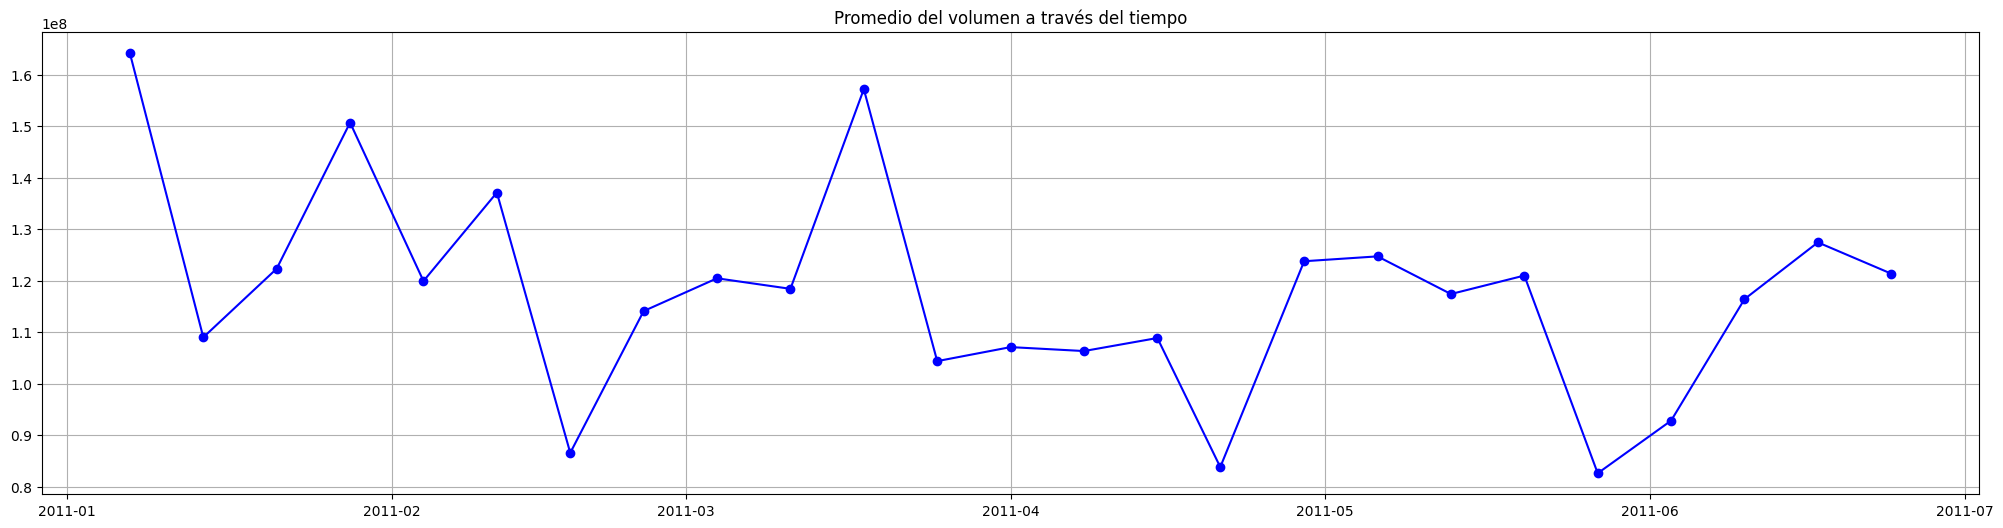

In [232]:
fig = plt.figure(figsize=(25, 6))

plt.title('Promedio del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_mean['volume'], 'bo-')
plt.grid()
plt.show()

In [233]:
adf = adfuller (df["volume"], maxlag = 1)
print("T-test (Test Statistic): ", adf[0], "In")
print("P-value: ", adf[1], "\n")
print("Valores criticos (Critical Value): ", adf[4])

T-test (Test Statistic):  -7.5796458194602465 In
P-value:  2.703191222000702e-11 

Valores criticos (Critical Value):  {'1%': -3.43912257105195, '5%': -2.8654117005229844, '10%': -2.568831705010152}


## Max

In [234]:
daily_max = df.groupby(df.index).max()

In [235]:
print(daily_max.head())

              high     low      volume  percent_change_price
date                                                        
2011-01-07  148.86  146.64  1453438639               6.79773
2011-01-14  150.00  146.00   760935694               7.62174
2011-01-21  156.78  149.38   982445809               4.00421
2011-01-28  164.35  155.33  1054415375               3.81916
2011-02-04  164.20  158.68   757192224               6.10225


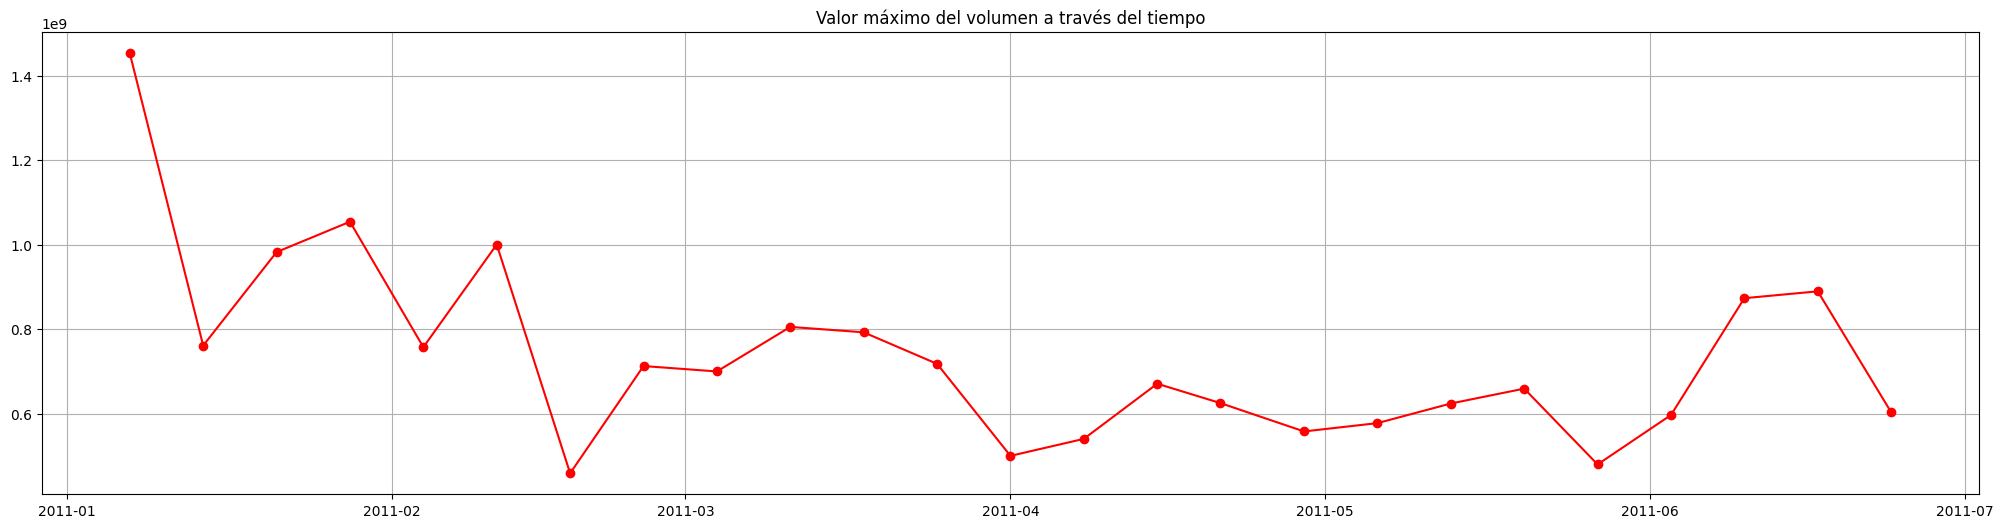

In [236]:
fig = plt.figure(figsize=(25, 6))

plt.title('Valor máximo del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_max['volume'], 'ro-')
plt.grid()
plt.show()

## Min

In [237]:
daily_min = df.groupby(df.index).min()

In [238]:
print(daily_min.head())

             high    low    volume  percent_change_price
date                                                    
2011-01-07  14.69  13.80  15797841              -4.92066
2011-01-14  15.25  14.09  11585909              -8.13204
2011-01-21  15.16  13.94  10705548              -5.50398
2011-01-28  14.26  13.40  23565688              -4.75570
2011-02-04  14.47  13.64  14960948              -1.20156


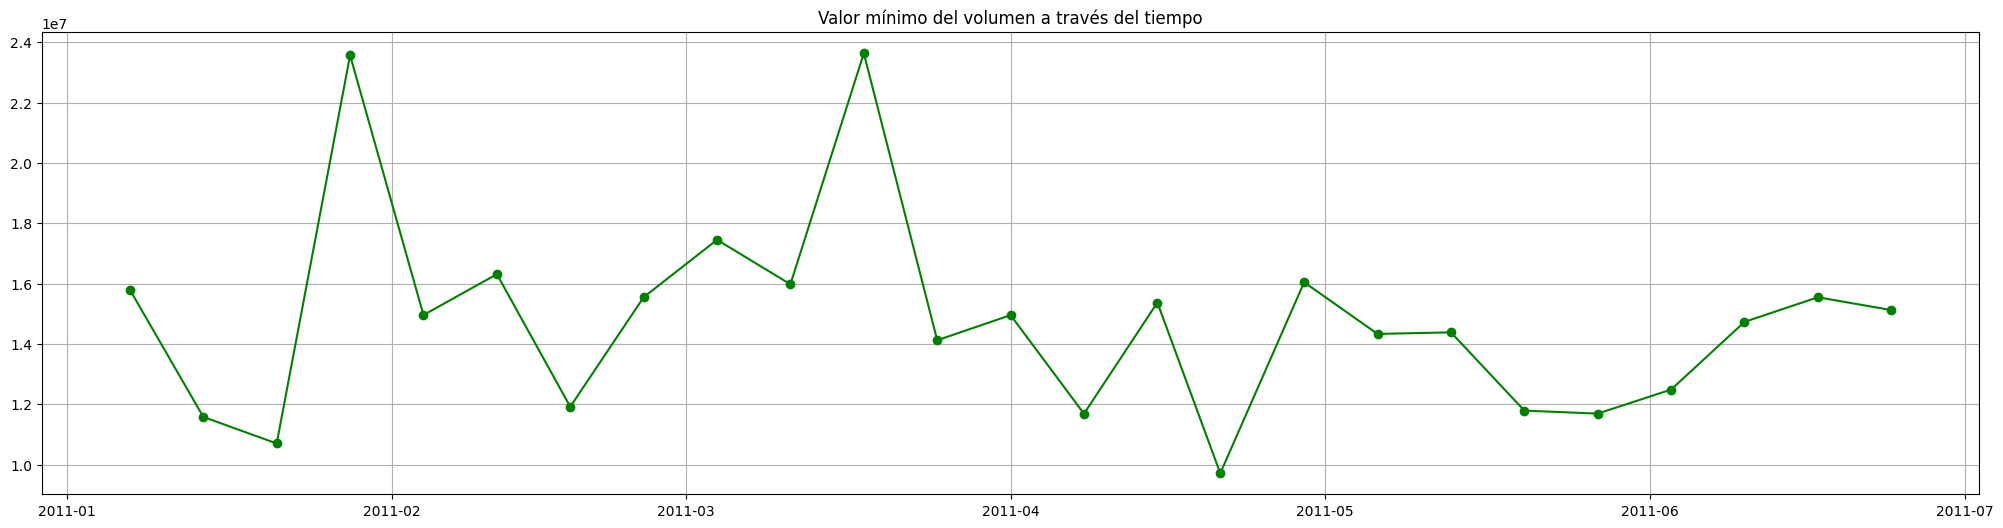

In [239]:
fig = plt.figure(figsize=(25, 6))

plt.title('Valor mínimo del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_min['volume'], 'go-')
plt.grid()
plt.show()

## Median

In [240]:
daily_median = df.groupby(df.index).median()

In [241]:
print(daily_median.head())

              high     low      volume  percent_change_price
date                                                        
2011-01-07  45.495  42.875  68495833.0             -0.093403
2011-01-14  46.250  44.290  43414161.5              1.340270
2011-01-21  47.175  45.235  47106921.0              0.439145
2011-01-28  47.050  44.810  69794209.5             -0.972797
2011-02-04  46.760  44.715  59091744.5              2.070980


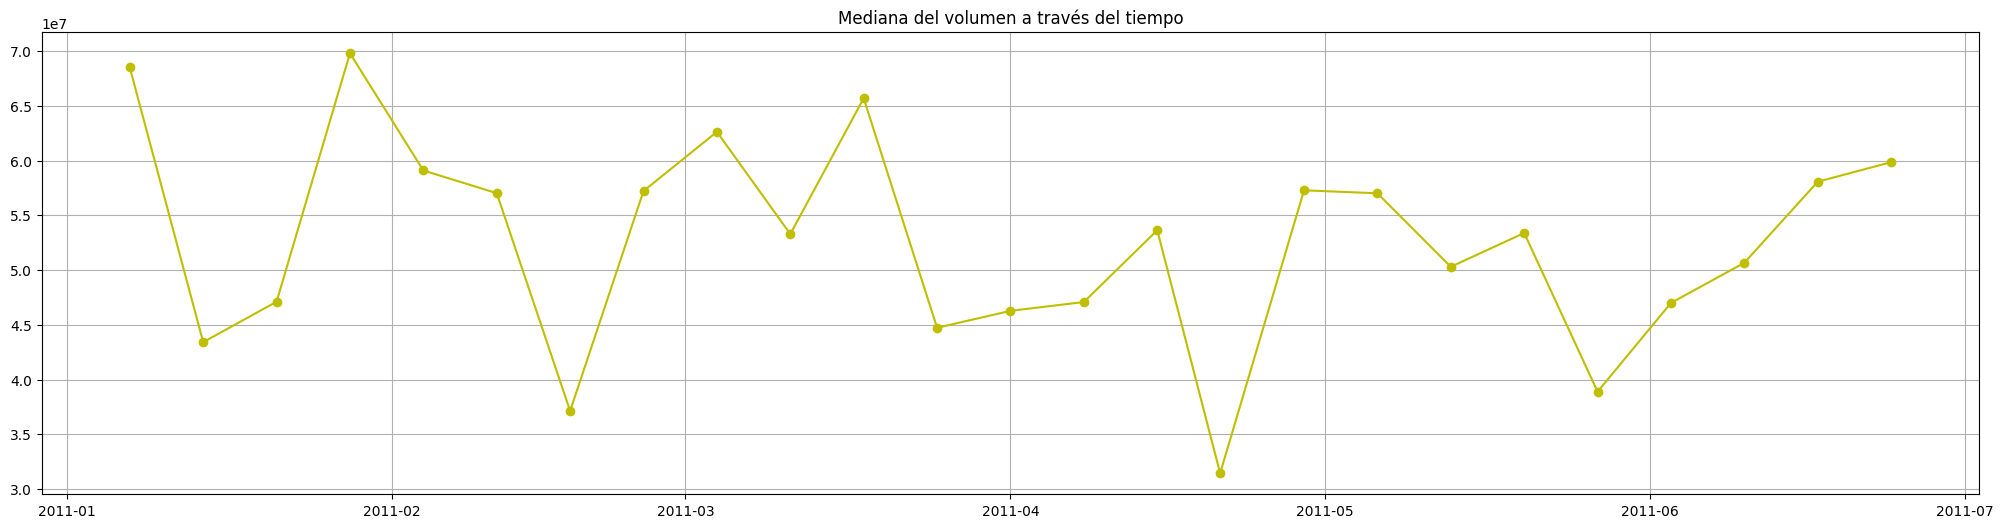

In [242]:
fig = plt.figure(figsize=(25, 6))

plt.title('Mediana del volumen a través del tiempo')
plt.plot(daily_mean.index, daily_median['volume'], 'yo-')
plt.grid()
plt.show()

## Estacionalidad

In [243]:
rolling_mean = daily_median.rolling(7).mean()
rolling_std = daily_median.rolling(7).std()

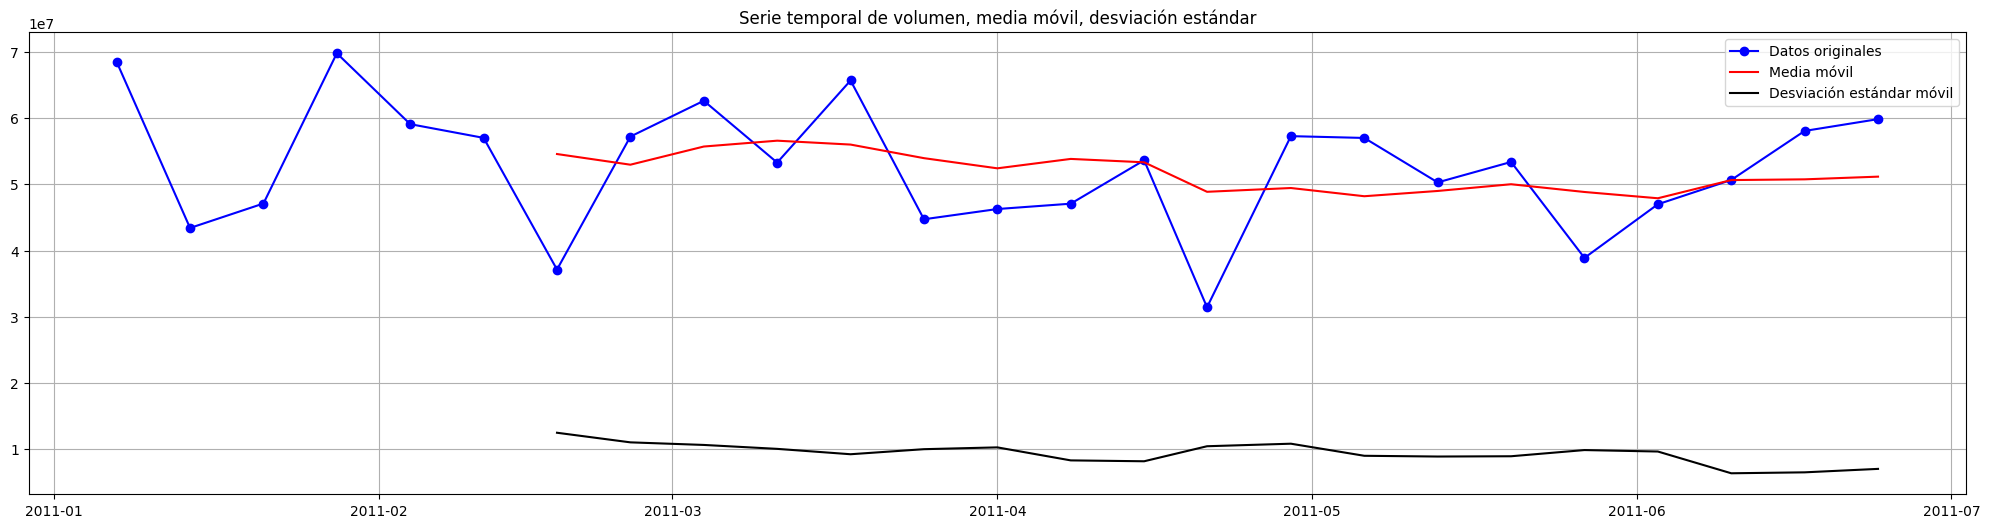

In [244]:
fig = plt.figure(figsize = (25, 6))

original, = plt.plot(daily_median.index, daily_median['volume'], 'bo-', label = 'Datos originales')
roll_mean, = plt.plot(rolling_mean.index, rolling_mean['volume'], 'r-', label = 'Media móvil')
roll_std, = plt.plot(rolling_std.index, rolling_std['volume'], 'k-', label = 'Desviación estándar móvil')

plt.title("Serie temporal de volumen, media móvil, desviación estándar")
plt.legend(handles = [original, roll_mean, roll_std], loc = "best")
plt.grid()
plt.show()

## Prueba de Dicky-Fuller

In [246]:
adf = adfuller(df["volume"], maxlag = 1)

print("T-test (Test Statistic): ", adf[0], "\n")
print("p-value: ", adf[1], "\n")
print("Valores criticos (Critical Value): ", adf[4])

T-test (Test Statistic):  -7.5796458194602465 

p-value:  2.703191222000702e-11 

Valores criticos (Critical Value):  {'1%': -3.43912257105195, '5%': -2.8654117005229844, '10%': -2.568831705010152}


> Podemos observar por medio de la prueba de Dicky-Fuller que nuestra serie sí es estacionaria debido a que el resultado de `Test Statistic` es menor a todos los valores críticos que se obtuvieron. Del mismo modo, el `p-value` es menor al umbral de 0.05, lo cual confirma que hay estacionalidad y por lo tanto rechazamos la hipótesis nula.

## Regresion de Poisson

In [247]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [248]:
expr = """volume ~ high + low + percent_change_price"""

In [249]:
y_train, X_train = dmatrices(expr, df_train, return_type = 'dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type = 'dataframe')

In [250]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 volume   No. Observations:                  600
Model:                            GLM   Df Residuals:                      596
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5332e+10
Date:                Wed, 15 Nov 2023   Deviance:                   3.0663e+10
Time:                        17:39:50   Pearson chi2:                 4.79e+10
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.1581 

In [251]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()

In [252]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['volume']

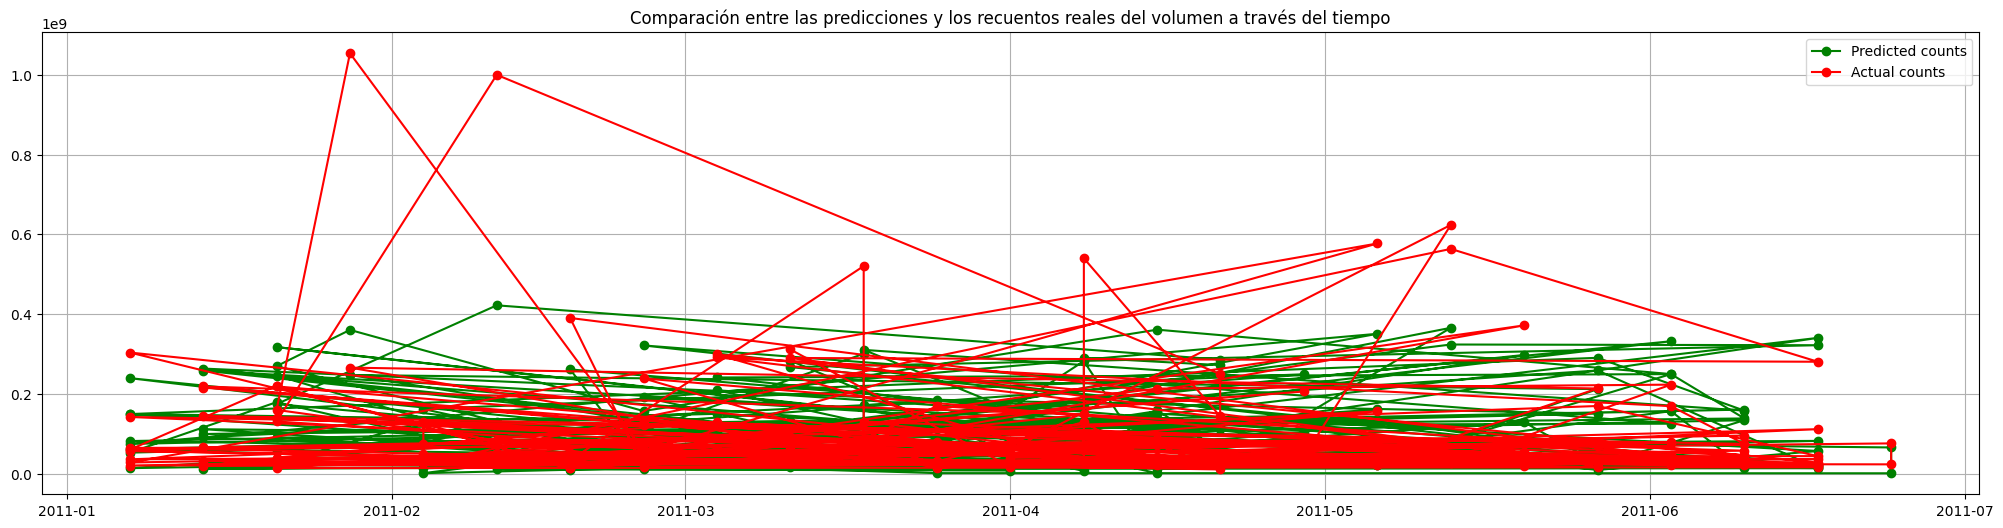

In [253]:
fig = plt.figure(figsize=(25,6))

predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.title('Comparación entre las predicciones y los recuentos reales del volumen a través del tiempo')
plt.legend(handles=[predicted, actual])
plt.grid()
plt.show()

Despues de realizar el preprocesamiento de los datos, analisis de estacionariedad y el resumen del modelo ¿Qué información/caracteristicas puede decir de los datos originales?

¿Qué pase si se intenta una operación de extrapolación (Forecasting) de los datos con el modelo?

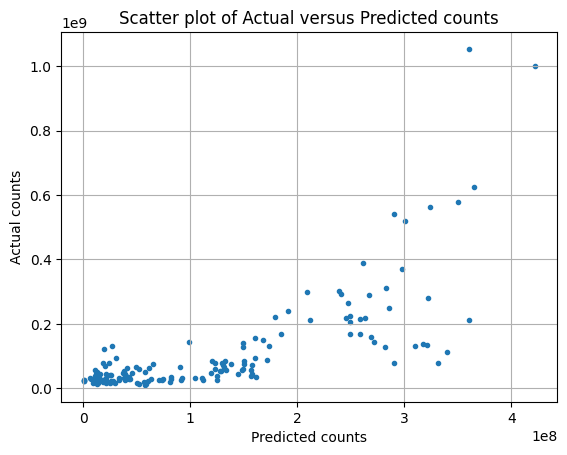

In [254]:
fig = plt.figure()

plt.scatter(x=predicted_counts, y=actual_counts, marker='.')

plt.title('Scatter plot of Actual versus Predicted counts')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.grid()
plt.show()

## Autocorrelación

In [255]:
autocorrelation = df['volume'].autocorr(lag = 1)
print(autocorrelation)

0.7800689851826702


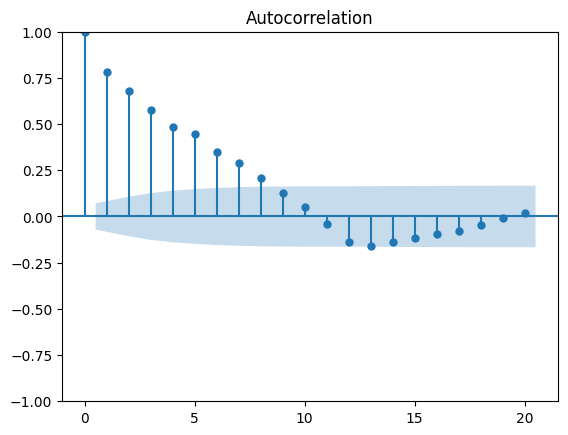

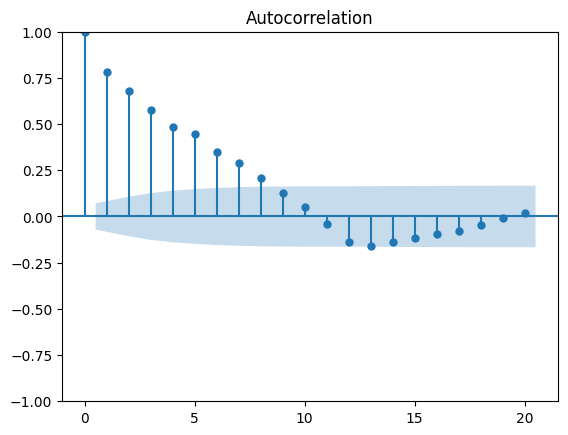

In [256]:
plot_acf(df['volume'],lags = 20)

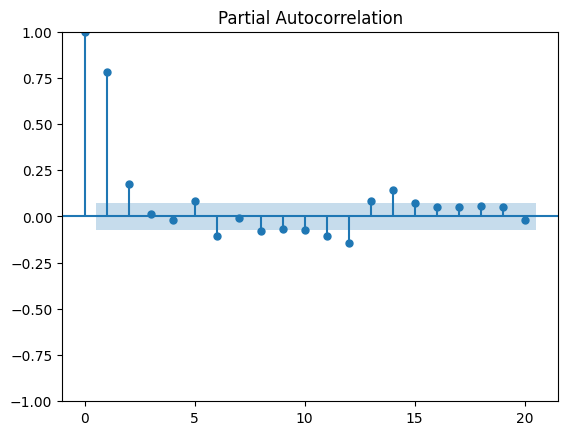

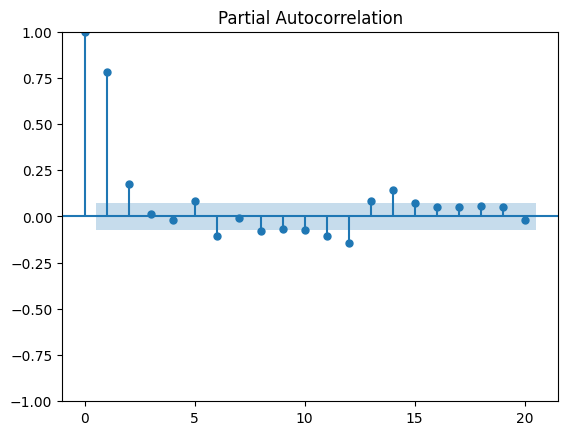

In [257]:
plot_pacf(df['volume'],lags=20)

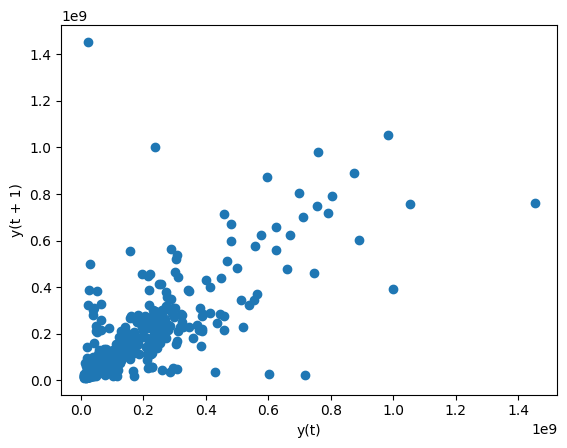

In [258]:
lag_plot(df['volume'])
pyplot.show()

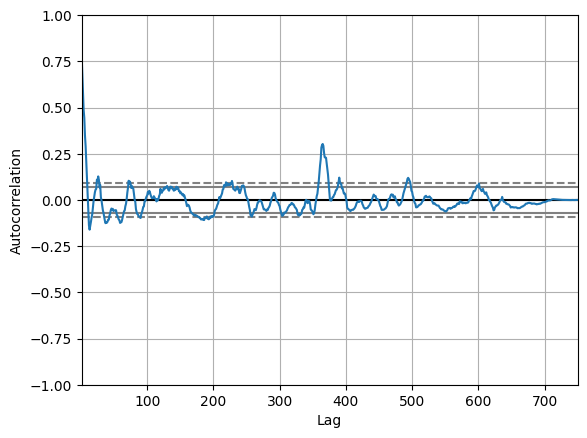

In [259]:
autocorrelation_plot(df['volume'])
pyplot.show()

In [200]:
from statsmodels.tsa.ar_model import AutoReg

# train autoregression
model = AutoReg(X_train, lags = 29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: maxlag should be < nobs

In [197]:
# make predictions
predictions = model_fit.predict(start = len(df_train),
end = len(df_train) + len(df_test) -1,
dynamic = False)
for i in range(len(predictions)):
  print('predicted=%f, expected=of' % (predictions[i],df_test[i]))

NameError: name 'model_fit' is not defined

## Modelos ARIMA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

best_aic = float("inf")
best_order = None

for p in range(1, 20):
    try:
        model = ARIMA(train, order = (p, 0, 0))
        model_fit = model.fit()
        aic = model_fit.aic
        print(f"AR({p}): AIC = {aic:.2f}")

        if aic < best aic:
            best_aic = aic
            best_order = (p, 0, 0)
            
    except Exception as e:
        print(f"Error for AR({p}): {e}")
        
print (f"\nBest AR order: {best_order} with AIC: {best_aic:.2f}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# fit model
model = ARIMA(series, order = (5,1, 0))
model_fit_arima = model.fit()
print('Coefficients: \n%s' % model_fit_arima.params)